In [27]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random

Load training and testing data using mnist

In [28]:
mnist = tf.keras.datasets.mnist

In [29]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [30]:
x_train = x_train / 255
x_test = x_test / 255

checking the size of img
x_train = x_train[0]
img_len, img_width = x_train.shape
print(f"img_len: {img_len}, img_width: {img_width}")

**DEFINE NETWORK ARCHITECTURE USING KERAS**

In [31]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

**Train the model using sgd**

In [33]:
model.compile(optimizer = "sgd",
              loss = "sparse_categorical_crossentropy",
              metrics = ['accuracy'])

In [34]:
history = model.fit(x_train, y_train,validation_data = (x_test,y_test), epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7372 - loss: 1.0200 - val_accuracy: 0.9011 - val_loss: 0.3597
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9013 - loss: 0.3567 - val_accuracy: 0.9184 - val_loss: 0.2950
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9139 - loss: 0.3032 - val_accuracy: 0.9265 - val_loss: 0.2615
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9248 - loss: 0.2656 - val_accuracy: 0.9331 - val_loss: 0.2416
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9319 - loss: 0.2414 - val_accuracy: 0.9378 - val_loss: 0.2213
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9361 - loss: 0.2225 - val_accuracy: 0.9417 - val_loss: 0.2058
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9434 - loss: 0.2066 - val_accuracy: 0.9440 - val_loss: 0.1939
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9459 - loss: 0.1920

**EVALUATE THE NETWORK**

In [35]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("loss = %.3f" %test_loss)
print("accuracy = %.3f" %test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9451 - loss: 0.1904
loss = 0.164
accuracy = 0.952


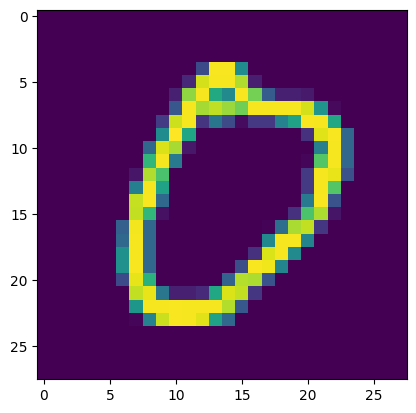

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


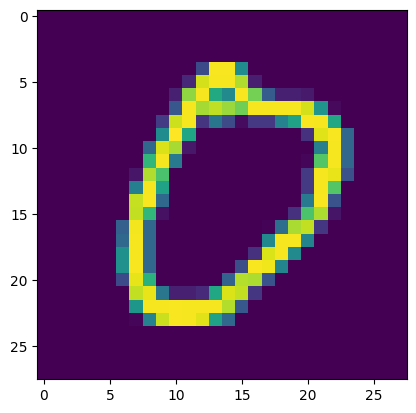

In [36]:
n = random.randint(0, 9999)
plt.imshow(x_test[n])
plt.show()
Predicted_value = model.predict(x_test)
plt.imshow(x_test[n])
plt.show()

**Plot the Training Loss and Accuracy**

**Trainig Accuracy**

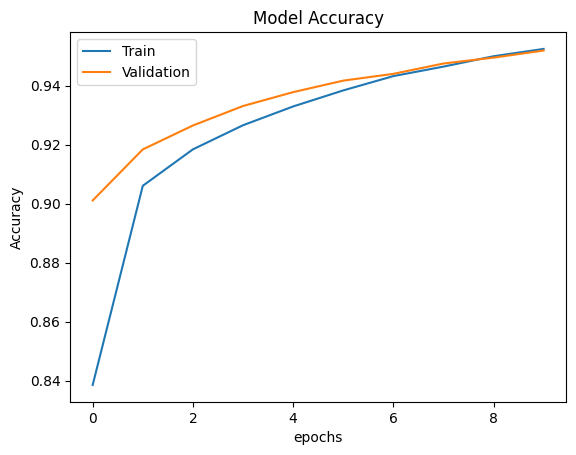

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epochs")
plt.legend(["Train", "Validation"], loc = "upper left")
plt.show()

**Training Loss**

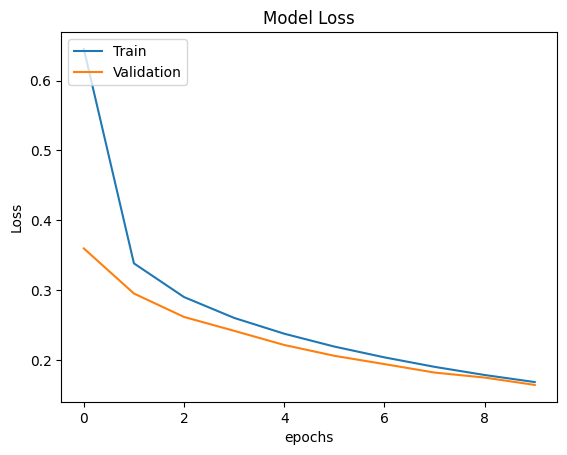

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("epochs")
plt.legend(["Train", "Validation"], loc = "upper left")
plt.show()